# Part 2. 딥러닝 몸풀기


## Chapter 1. 사인 함수 예측하기

### 1.2 3차 다항식 모델 정의하기

In [1]:
import math
import torch

x = torch.linspace(-math.pi, math.pi, 1000)
y = torch.sin(x)

이번에 사용할 3차 다항식 모델은 다음과 같이 표현이 가능합니다.

$ax^{3}+bx^{2}+cx+d=0,a\neq 0$

이를 식으로 표현해 보겠습니다.

In [2]:
#초기화
a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())

# 모델
y_random = (a * x**3) + (b * x**2) + (c * x) + d

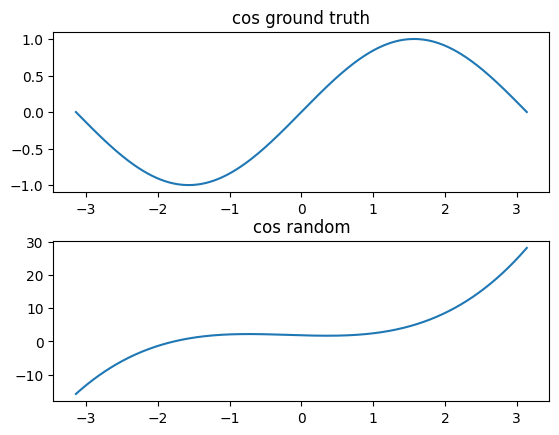

In [3]:
import matplotlib.pyplot as plt

plt.subplot(2,1,1)
plt.subplots_adjust(hspace=0.3)
plt.title("cos ground truth")
plt.plot(x,y)

plt.subplot(2,1,2)
plt.title("cos random")
plt.plot(x, y_random)

plt.show()

### 1.3 3차 다항식 모델 학습하기

In [4]:
# 하이퍼파라미터
learning_rate = 1e-6

# 데이터셋
x = torch.linspace(-math.pi, math.pi, 1000)
y = torch.sin(x)

# 모델 가중치 초기화
a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())

for epoch in range(2000):
  # 순전파
  y_pred = (a * x**3) + (b * x**2) + (c * x) + d

  # 오차 계산 (MSE)
  loss = (y_pred - y).pow(2).sum().item()

  # 백워드, 미분값(gradient) 계산
  grad_y_pred = 2.0 * (y_pred - y)
  grad_a = (grad_y_pred * x ** 3).sum()
  grad_b = (grad_y_pred * x ** 2).sum()
  grad_c = (grad_y_pred * x).sum()
  grad_d = grad_y_pred.sum()

  # 가중치 업데이트
  a -= learning_rate * grad_a
  b -= learning_rate * grad_b
  c -= learning_rate * grad_c
  d -= learning_rate * grad_d

  # 출력
  if epoch % 100 == 0:
    print("epoch: ", epoch, "loss: ", loss)

epoch:  0 loss:  36614.50390625
epoch:  100 loss:  3193.3671875
epoch:  200 loss:  2595.606201171875
epoch:  300 loss:  2111.309326171875
epoch:  400 loss:  1717.528564453125
epoch:  500 loss:  1397.3480224609375
epoch:  600 loss:  1137.00927734375
epoch:  700 loss:  925.3295288085938
epoch:  800 loss:  753.2123413085938
epoch:  900 loss:  613.2640991210938
epoch:  1000 loss:  499.47308349609375
epoch:  1100 loss:  406.9496765136719
epoch:  1200 loss:  331.718994140625
epoch:  1300 loss:  270.54864501953125
epoch:  1400 loss:  220.81126403808594
epoch:  1500 loss:  180.36981201171875
epoch:  1600 loss:  147.48699951171875
epoch:  1700 loss:  120.74995422363281
epoch:  1800 loss:  99.00984191894531
epoch:  1900 loss:  81.33293151855469


In [5]:
print(a, b, c, d)

tensor(-0.1422) tensor(0.0018) tensor(1.2007) tensor(-0.0104)


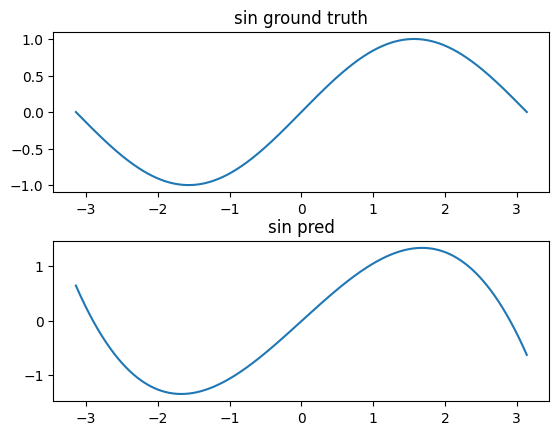

In [6]:
plt.subplot(2,1,1)
plt.subplots_adjust(hspace=0.3)
plt.title("sin ground truth")
plt.plot(x,y)

plt.subplot(2,1,2)
plt.title("sin pred")
plt.plot(x, y_pred)

랜덤으로 초기화 했을때 보다 확실히 비슷하게 예측하고 있는것을 확인할 수 있습니다.

학습 가중치 하나하나마다 미분도하고 업데이트도 해주고 해야할 일이 너무 많다구요? 학습할 가중치가 1조개가 되면 이걸 다 어떻게 하냐구요? 맞습니다. 1조개 가중치를 하나하나 한다면 1조줄 짜리 코드가 생기겠죠. 걱정하지마세요. 파이토피에서는 자동 미분과 최적화기를 통해 기울기를 구하는 과정과 가중치를 업데이트 하는 과정을 편리하게 할 수 있도록 제공하고 있습니다. 다음 부터 하나씩 적용해가며 어떻게 사용하는지 알아보겠습니다.

### 1.4 자동 미분(Auto-grad)

In [27]:
# 하이퍼파라미터
learning_rate = 1e-6

# 데이터셋
x = torch.linspace(-math.pi, math.pi, 1000)
y = torch.sin(x)

# 모델 가중치 초기화
a = torch.tensor(torch.randn(()), requires_grad=True)
b = torch.tensor(torch.randn(()), requires_grad=True)
c = torch.tensor(torch.randn(()), requires_grad=True)
d = torch.tensor(torch.randn(()), requires_grad=True)

for epoch in range(2000):
  # 순전파
  y_pred = (a * x**3) + (b * x**2) + (c * x) + d

  # 오차 계산 (MSE)
  loss = (y_pred - y).pow(2).sum()

  # 백워드
  loss.backward()

  # 가중치 업데이트
  with torch.no_grad():
    a -= learning_rate * a.grad
    b -= learning_rate * b.grad
    c -= learning_rate * c.grad
    d -= learning_rate * d.grad

    a.grad = None
    b.grad = None
    c.grad = None
    d.grad = None

  # 출력
  if epoch % 100 == 0:
    print("epoch: ", epoch, "loss: ", loss.item())

epoch:  0 loss:  136826.265625
epoch:  100 loss:  234.8564453125
epoch:  200 loss:  177.6843719482422
epoch:  300 loss:  145.35960388183594
epoch:  400 loss:  119.07050323486328
epoch:  500 loss:  97.68680572509766
epoch:  600 loss:  80.29285430908203
epoch:  700 loss:  66.14412689208984
epoch:  800 loss:  54.63502502441406
epoch:  900 loss:  45.27283477783203
epoch:  1000 loss:  37.65705490112305
epoch:  1100 loss:  31.46178436279297
epoch:  1200 loss:  26.421939849853516
epoch:  1300 loss:  22.321964263916016
epoch:  1400 loss:  18.98659896850586
epoch:  1500 loss:  16.273174285888672
epoch:  1600 loss:  14.065664291381836
epoch:  1700 loss:  12.269680976867676
epoch:  1800 loss:  10.808512687683105
epoch:  1900 loss:  9.619705200195312


/var/folders/rk/_ttlbs4s2b91r21w4sb2pbxm0000gp/T/ipykernel_15243/4235490588.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  a = torch.tensor(torch.randn(()), requires_grad=True)
/var/folders/rk/_ttlbs4s2b91r21w4sb2pbxm0000gp/T/ipykernel_15243/4235490588.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b = torch.tensor(torch.randn(()), requires_grad=True)
/var/folders/rk/_ttlbs4s2b91r21w4sb2pbxm0000gp/T/ipykernel_15243/4235490588.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  c = torch.tensor(torch.randn(()), requires_grad=Tr

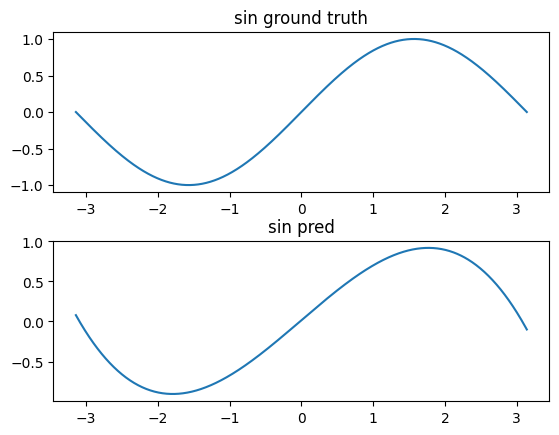

In [28]:
y_pred = y_pred.detach().numpy()

plt.subplot(2,1,1)
plt.subplots_adjust(hspace=0.3)
plt.title("sin ground truth")
plt.plot(x,y)

plt.subplot(2,1,2)
plt.title("sin pred")
plt.plot(x, y_pred)

### 1.5 파이토치 모듈 사용하기

파이토치는 모델을 nn.Module을 상속받는 클래스 형태로 정의하여 사용하는 스타일을 권장하고 있습니다. 앞서 사용한 3차 다항식모델을 nn.Module을 이용한 모델로 만들어 보겠습니다.

In [29]:
import torch
import torch.nn as nn

class LegendrePolynomial3(nn.Module):
  def __init__(self):
    super().__init__()

    self.a = nn.Parameter(torch.randn(()))
    self.b = nn.Parameter(torch.randn(()))
    self.c = nn.Parameter(torch.randn(()))
    self.d = nn.Parameter(torch.randn(()))

  def forward(self, x):
    return (self.a * x ** 3) + (self.b * x ** 2) + (self.c * x) + self.d

In [30]:
# 하이퍼파라미터
learning_rate = 1e-6

# 데이터셋
x = torch.linspace(-math.pi, math.pi, 1000)
y = torch.sin(x)

# 모델 초기화
model = LegendrePolynomial3()

for epoch in range(2000):
  # 순전파
  y_pred = model(x)

  # 오차 계산 (MSE)
  loss = nn.MSELoss(reduction='sum')(y_pred, y) # SSE, Sum Square Error

  # 백워드
  loss.backward()

  # 가중치 업데이트
  with torch.no_grad():
    model.a -= learning_rate * model.a.grad
    model.b -= learning_rate * model.b.grad
    model.c -= learning_rate * model.c.grad
    model.d -= learning_rate * model.d.grad

    model.a.grad = None
    model.b.grad = None
    model.c.grad = None
    model.d.grad = None

  # 출력
  if epoch % 100 == 0:
    print("epoch: ", epoch, "loss: ", loss.item())

epoch:  0 loss:  48641.95703125
epoch:  100 loss:  54.24842071533203
epoch:  200 loss:  40.53699493408203
epoch:  300 loss:  34.787498474121094
epoch:  400 loss:  29.95523452758789
epoch:  500 loss:  25.892459869384766
epoch:  600 loss:  22.47657012939453
epoch:  700 loss:  19.604507446289062
epoch:  800 loss:  17.189666748046875
epoch:  900 loss:  15.159201622009277
epoch:  1000 loss:  13.451900482177734
epoch:  1100 loss:  12.016312599182129
epoch:  1200 loss:  10.80916976928711
epoch:  1300 loss:  9.79410457611084
epoch:  1400 loss:  8.940539360046387
epoch:  1500 loss:  8.222764015197754
epoch:  1600 loss:  7.619180679321289
epoch:  1700 loss:  7.111608505249023
epoch:  1800 loss:  6.68476676940918
epoch:  1900 loss:  6.32581090927124


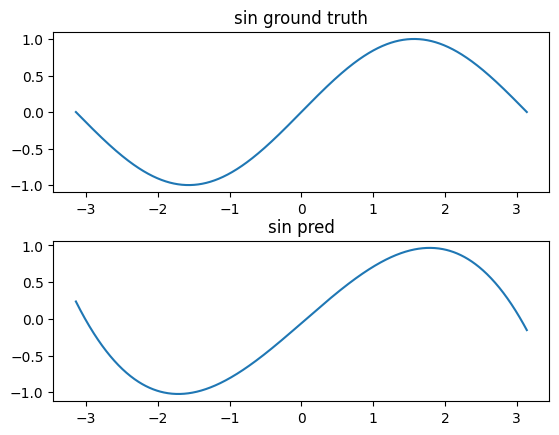

In [31]:
x = x.squeeze()
y_pred = model(x).detach().squeeze().numpy()
y = y.squeeze()

plt.subplot(2,1,1)
plt.subplots_adjust(hspace=0.3)
plt.title("sin ground truth")
plt.plot(x,y)

plt.subplot(2,1,2)
plt.title("sin pred")
plt.plot(x, y_pred)

### 1.6 최적화 함수

In [32]:
# 하이퍼파라미터
learning_rate = 1e-6

# 데이터셋
x = torch.linspace(-math.pi, math.pi, 1000)
y = torch.sin(x)

# 모델 초기화
model = LegendrePolynomial3()

# 손실함수
criterion = nn.MSELoss(reduction='sum')

# 최적화 함수
print(list(model.parameters()))
optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate)

for epoch in range(2000):
  # 미분값 초기화
  optimizer.zero_grad()

  # 순전파
  y_pred = model(x)

  # 오차 계산
  loss = criterion(y_pred, y)

  # 백워드
  loss.backward()

  # 가중치 업데이트
  optimizer.step()

  # 출력
  if epoch % 100 == 0:
    print("epoch: ", epoch, "loss: ", loss.item())

[Parameter containing:
tensor(1.6102, requires_grad=True), Parameter containing:
tensor(-0.6421, requires_grad=True), Parameter containing:
tensor(-0.4759, requires_grad=True), Parameter containing:
tensor(-0.4463, requires_grad=True)]
epoch:  0 loss:  328146.34375
epoch:  100 loss:  1068.446533203125
epoch:  200 loss:  868.4707641601562
epoch:  300 loss:  707.911376953125
epoch:  400 loss:  577.2137451171875
epoch:  500 loss:  470.8193359375
epoch:  600 loss:  384.20556640625
epoch:  700 loss:  313.6920166015625
epoch:  800 loss:  256.283447265625
epoch:  900 loss:  209.54226684570312
epoch:  1000 loss:  171.4844970703125
epoch:  1100 loss:  140.49571228027344
epoch:  1200 loss:  115.26166534423828
epoch:  1300 loss:  94.7125244140625
epoch:  1400 loss:  77.97776794433594
epoch:  1500 loss:  64.34862518310547
epoch:  1600 loss:  53.24818420410156
epoch:  1700 loss:  44.206687927246094
epoch:  1800 loss:  36.84188461303711
epoch:  1900 loss:  30.842527389526367


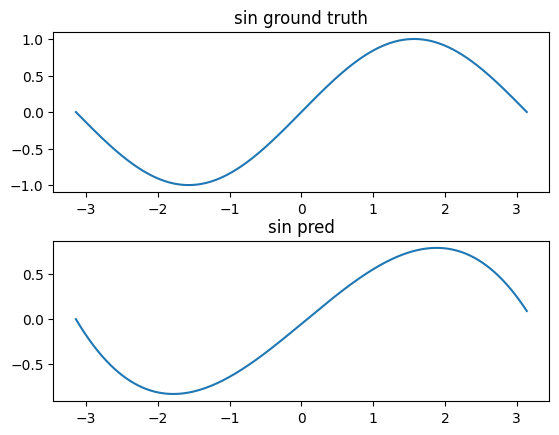

In [33]:
x = x.squeeze()
y_pred = model(x).clone().detach().squeeze().numpy()
y = y.squeeze()

plt.subplot(2,1,1)
plt.subplots_adjust(hspace=0.3)
plt.title("sin ground truth")
plt.plot(x,y)

plt.subplot(2,1,2)
plt.title("sin pred")
plt.plot(x, y_pred)